In [1]:
from new_structure import *

In [2]:
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-65.0, 40.0])

# lowest fuel consumption
calm_r = ship_info.weather2fuel(20, 0, 0, 0, -10000, 0, 0, 0.01, 0.01, 0)
minifuelc = calm_r[3] * greatcircle_inverse(p_dep[0], p_dep[1], p_des[0], p_des[1])[0] / 1.852
initial_time = 25
velocity = 20
gentic = state(p_dep,p_des, 40, initial_time, velocity)

In [3]:
pop, results = gentic.recursion(0, 1000, 5, 0.2, 0.05, 0.1)
inform = gentic.gatherinfo(pop, minifuelc)

In [4]:
hs = {}
for i in xrange(40):
    hs[i] = []
    for j in xrange(240):
        hs[i].append(weather_info.hs([gentic.y[i], gentic.x[i], j]))
    hs[i] = np.array(hs[i]).ravel()

In [5]:
m = Basemap(
  projection="merc",
  resolution='l',
  area_thresh=0.1,
  llcrnrlon=-75,
  llcrnrlat=35,
  urcrnrlon=10,
  urcrnrlat=55
)

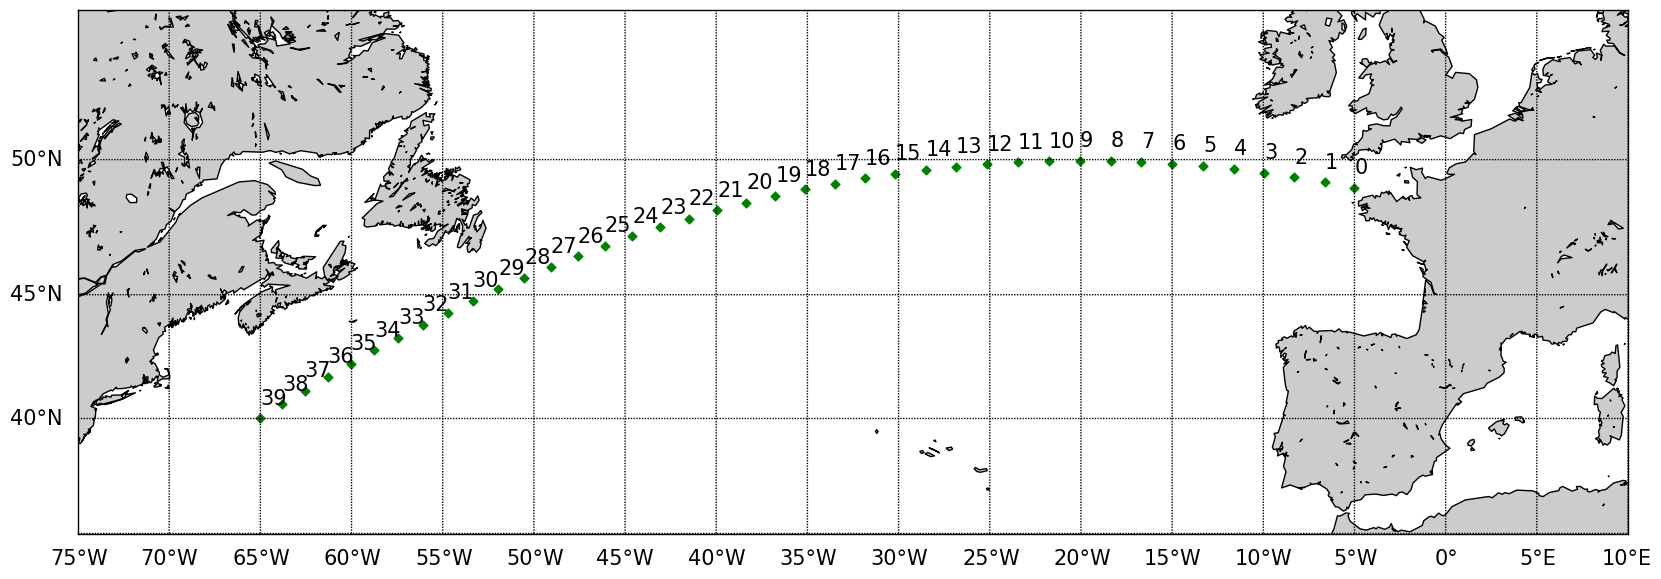

In [6]:
plt.figure(figsize=(20, 15))
X, Y = m(gentic.x, gentic.y)
#m.drawgreatcircle(p_dep[0], p_dep[1], p_des[0], p_des[1], linewidth=2,color='b')
m.scatter(X, Y, marker='D',color='g')
for i, (x, y) in enumerate(zip(X, Y)):
    plt.annotate(str(i), (x,y), xytext=(0, 10), textcoords='offset points', fontsize = 15)
m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
plt.show()

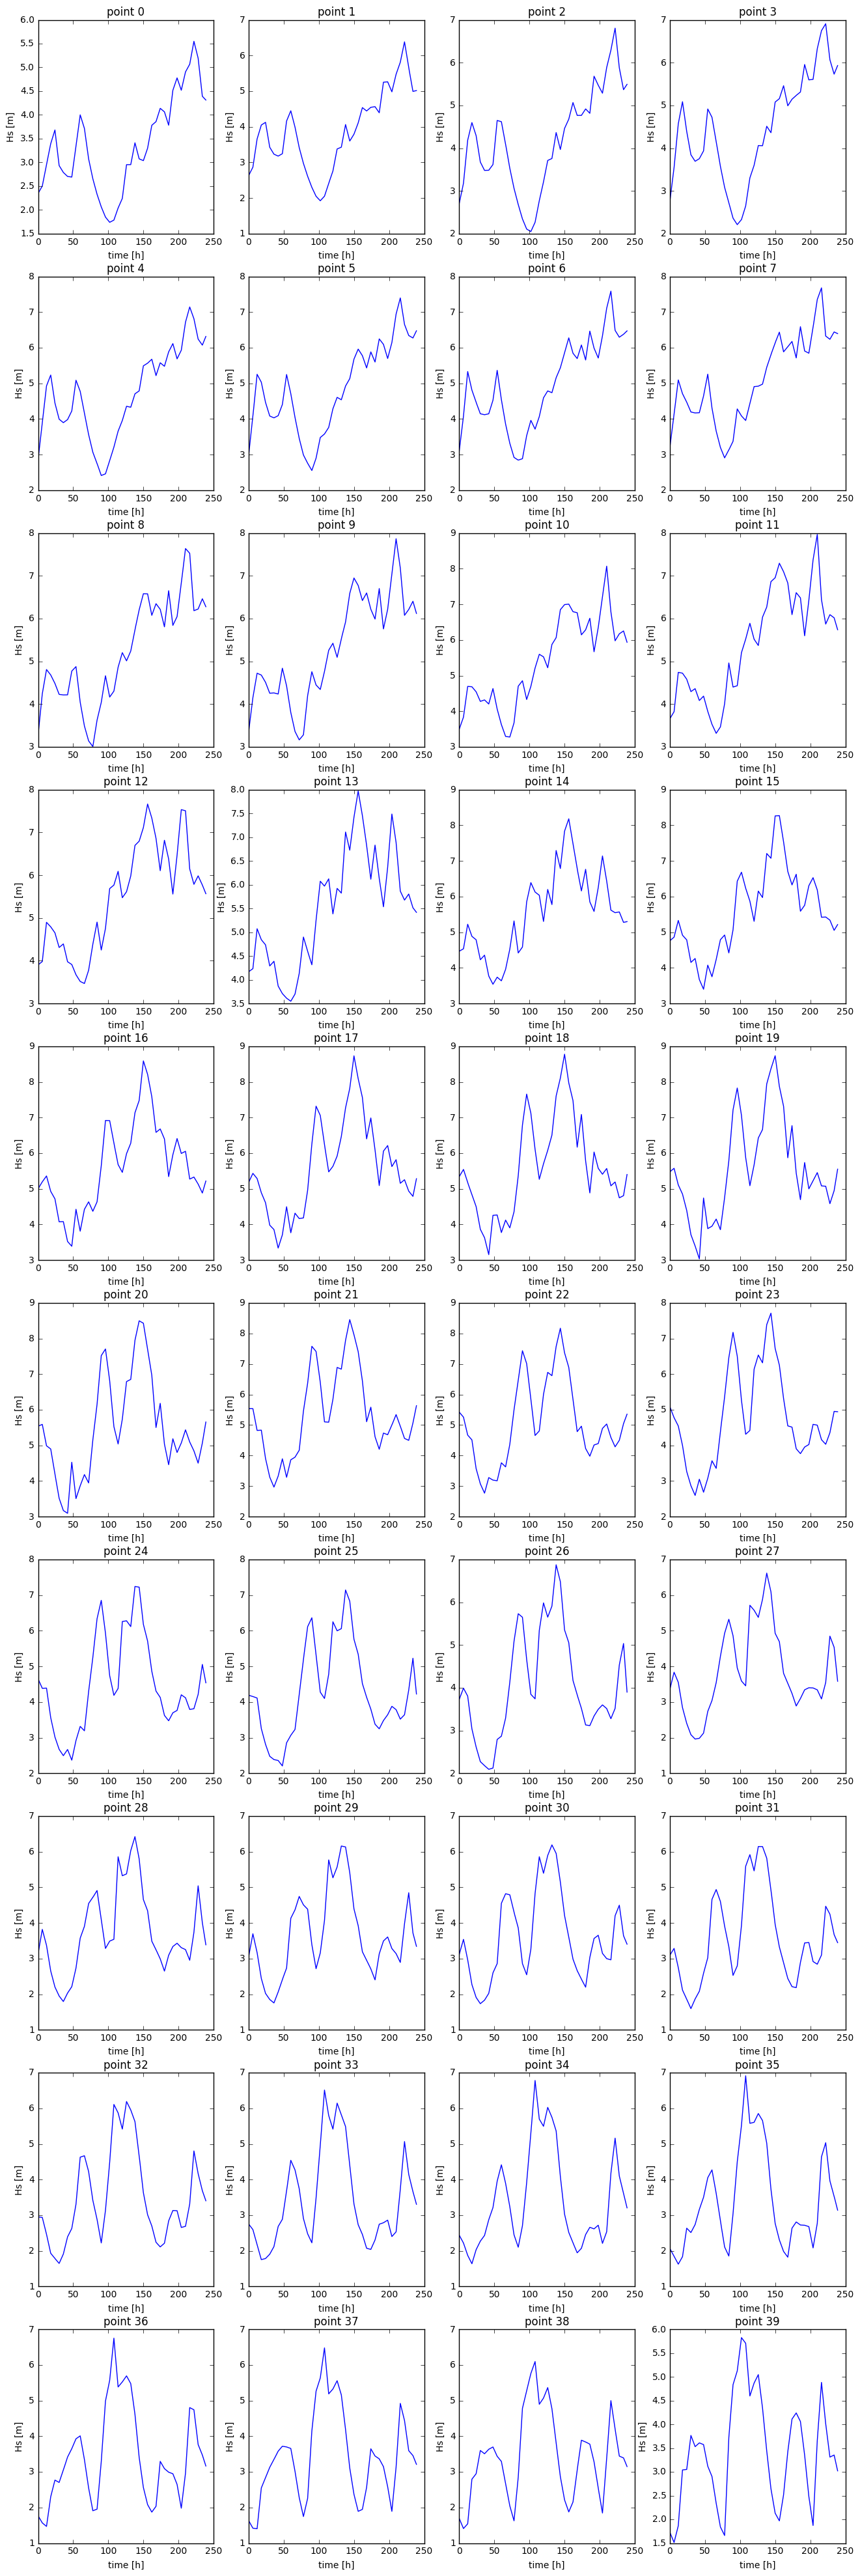

In [7]:
ti = range(240)
plt.figure(figsize=(16, 50))
for i in xrange(40):
    ax = plt.subplot(10,4,i+1)
    ax.set_title("point %d" %i)
    ax.set_ylabel('Hs [m]')
    ax.set_xlabel('time [h]')
    plt.plot(ti, hs[i])
plt.show()
    

In [8]:
Hs = [weather_info.hs([i[1],i[0],i[2]]) for i in inform]

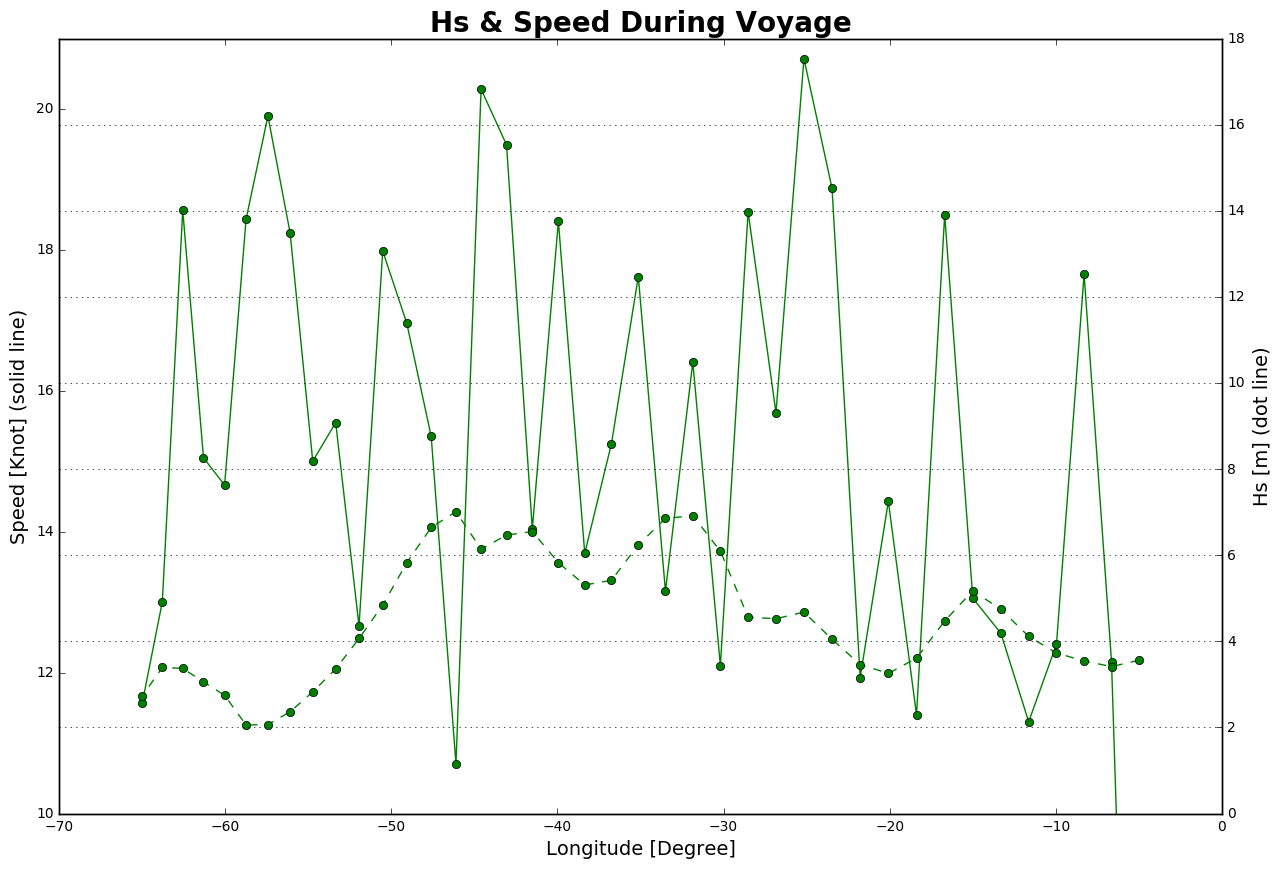

In [10]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()


ax1.set_title("Hs & Speed During Voyage", fontsize = 20, fontweight='bold')
ax1.set_xlabel("Longitude [Degree]", fontsize = 14)
ax1.set_ylabel("Speed [Knot] (solid line)", fontsize = 14)
ax1.set_ylim([10,21])
ax1.plot(inform[:,0], inform[:,3], marker = "o", color = "g")

ax2.set_ylabel("Hs [m] (dot line)", fontsize = 14)
ax2.set_ylim([0,18])
ax2.plot(inform[:,0], Hs, marker = "o", color = "g", linestyle = "--")




plt.grid()

plt.show()

In [21]:
print "Calculated time consumption: %f \nTime consumption at service speed: %f" %(max(inform[:,2]), gentic.cultime(gentic.delta_t)[-1])

Calculated time consumption: 196.297995 
Time consumption at service speed: 152.808379


In [22]:
print "Calculated fuel consumption result : %f \nIdeal fuel consumption in service speed : %f" %(results[-1], minifuelc)

Calculated fuel consumption result : 280135.067657 
Ideal fuel consumption in service speed : 484438.650904
